**Note:** Please, make sure you have installed of *numpy*, *matplotlib* and *pandas* package.

In [1]:
import numpy as np
import pandas as pd
from numpy import inf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
p_x_y = np.array([[.3, .3, 0], [.1, .2, .1]])

In [3]:
p_x = np.sum(p_x_y, axis=1)
p_y = np.sum(p_x_y, axis=0)
p_x_given_y = p_x_y / np.sum(p_x_y, axis=0)
p_y_given_x = p_x_y / p_x[:, np.newaxis]

In [4]:
expected_value = lambda z, p_z: np.sum(z * p_z)

**1.** Expectations of $<x>$, $<y>$, $<y|x>$ $<x|y>$, and $Cov[x, y]$

In [5]:
expected_x = expected_value([1, 2], p_x)
expected_y = expected_value([-1, 0, 5], p_y)
expected_y_given_x = expected_value([[1], [2]], p_y_given_x)
expected_x_given_y = expected_value([-1, 0, 5], p_x_given_y)
cov = expected_value(np.matmul(([1, 2] - expected_x).reshape(2,1), ([-1, 0, 5] - expected_y).reshape(1,3)), p_x_y)

In [6]:
print("<x> = {}".format(expected_x))
print("<y> = {}".format(expected_y))
print("<y|x> = {}".format(expected_y_given_x))
print("<x|y> = {}".format(expected_x_given_y))
print("Cov[x, y] = {}".format(cov))

<x> = 1.4
<y> = 0.09999999999999998
<y|x> = 3.0
<x|y> = 4.0
Cov[x, y] = 0.36000000000000004


**2.** Joint Entropy of $H[x,y] = -<logp(x,y)>_{p(x,y)}$

In [7]:
log_p_x_y = np.log(p_x_y)
log_p_x_y[log_p_x_y == -inf] = 0
joint_entropy = - expected_value(log_p_x_y, p_x_y)

In [8]:
print("H[x,y] = {}".format(joint_entropy))

H[x,y] = 1.5047882836811908


**3.** Marginal Entropies of 
- $H[x] = - <logp(x)>_{p(x)}$
- $H[y] = - <logp(y)>_{p(y)}$

In [9]:
log_p_x = np.log(p_x)
marginal_entropy_x = - expected_value(log_p_x, p_x)

log_p_y = np.log(p_y)
marginal_entropy_y = - expected_value(log_p_y, p_y)

In [10]:
print("H[x] = {}".format(marginal_entropy_x))
print("H[y] = {}".format(marginal_entropy_y))

H[x] = 0.6730116670092565
H[y] = 0.9433483923290391


**4.** Contional Entropies of 
- $H[y|x] = - <logp(y|x)>_{p(x,y)}$
- $H[x|y] = - <logp(x|y)>_{p(x,y)}$

In [11]:
log_p_y_given_x = np.log(p_y_given_x)
log_p_y_given_x[log_p_y_given_x == -inf] = 0
conditional_entropy_y_given_x = - expected_value(log_p_y_given_x, p_x_y)

log_p_x_given_y = np.log(p_x_given_y)
log_p_x_given_y[log_p_x_given_y == -inf] = 0
conditional_entropy_x_given_y = - expected_value(log_p_x_given_y, p_x_y)

In [12]:
print("H[y|x] = {}".format(conditional_entropy_y_given_x))
print("H[x|y] = {}".format(conditional_entropy_x_given_y))

H[y|x] = 0.8317766166719344
H[x|y] = 0.5614398913521517


**5.** Mutual Information $I(x,y) = H[x] - H[x|y] = KL(p(x,y) || p(x)p(y))$

In [13]:
mutual_information = marginal_entropy_x - conditional_entropy_x_given_y

In [14]:
print("I(x,y) = {}".format(mutual_information))

I(x,y) = 0.11157177565710485


**6.** Test your program for the following joint probability table.

I tested the table above.

**7.** Verify the following picture

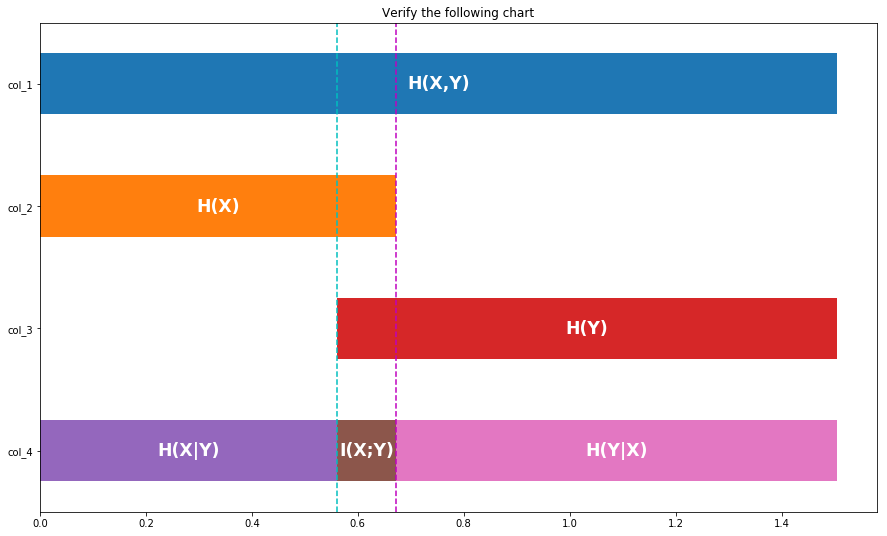

In [15]:
index = ['col_1', 'col_2', 'col_3', 'col_4']
df = pd.DataFrame({'H(X,Y)': pd.Series([joint_entropy,np.nan,np.nan,np.nan], index=index),
                  'H(X)': pd.Series([np.nan,marginal_entropy_x,np.nan,np.nan], index=index),
                  'padding for H(Y)': pd.Series([np.nan,np.nan,joint_entropy-marginal_entropy_y,np.nan], index=index),
                  'H(Y)': pd.Series([np.nan,np.nan,marginal_entropy_y,np.nan], index=index),
                  'H(X|Y)': pd.Series([np.nan,np.nan,np.nan,conditional_entropy_x_given_y], index=index),
                  'I(X;Y)': pd.Series([np.nan,np.nan,np.nan,mutual_information], index=index),
                  'H(Y|X)': pd.Series([np.nan,np.nan,np.nan,conditional_entropy_y_given_x], index=index),
              })
df = df.iloc[::-1]
ax = df.plot.barh(title="Verify the following chart", legend=False, figsize=(15,9), stacked=True)

ax.barh([1], [joint_entropy-marginal_entropy_y], color='w')

ax.text(joint_entropy/2, 3, 'H(X,Y)', weight='bold', size='xx-large', ha='center', va='center', color='white')
ax.text(marginal_entropy_x/2, 2, 'H(X)', weight='bold', size='xx-large', ha='center', va='center', color='white')
ax.text(joint_entropy-marginal_entropy_y/2, 1, 'H(Y)', weight='bold', size='xx-large', ha='center', va='center', color='white')
ax.text(conditional_entropy_x_given_y/2, 0, 'H(X|Y)', weight='bold', size='xx-large', ha='center', va='center', color='white')
ax.text(conditional_entropy_x_given_y+mutual_information/2, 0, 'I(X;Y)', weight='bold', size='xx-large', ha='center', va='center', color='white')
ax.text(joint_entropy-conditional_entropy_y_given_x/2, 0, 'H(Y|X)', weight='bold', size='xx-large', ha='center', va='center', color='white')

plt.axvline(x=marginal_entropy_x, color='m', linestyle='--')
plt.axvline(x=joint_entropy-marginal_entropy_y, color='c', linestyle='--')

plt.show()